<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 4

## San Francisco Data

---

[San Francisco provides a wealth of data on the city to the public.](https://data.sfgov.org/) Project 4 is all about exploring this data and modeling interesting relationships with regression.

Project 4 is also much more open-ended than the previous projects. You are more responsible for finding things about the data that interest you, coming up with your own hypothesis about it, and reporting on the analysis you carry out. That being said, there are still specific requirements and restrictions on the type of models you will be constructing.

---

## Notes on the data

We have gone through the above website and pulled out a variety of different datasets that we think are particularly interesting. Some of the datasets are from external sources as well, but all are related to San Francisco. A high level overview of data folders is provided after the project requirements section.

**There is a lot of different data. You are _NOT_ expected to explore all of it or include all of it in analyses.** The point of the project is to focus on aspects of San Francisco that are particularly interesting to you from a modeling point of view. 

**The uncompressed data is a large filesize.** Even the compressed data is pretty large. The data is compressed into a .7z format which has one of the smallest filesizes available. You will likely need a 3rd party app to extract it. 

### Recommended Utilities for .7z
- For OSX [Keka](http://www.kekaosx.com/en/) or [The Unarchiver](http://wakaba.c3.cx/s/apps/unarchiver.html). 
- For Windows [7-zip](http://www.7-zip.org/) is the standard. 
- For Linux try the `p7zip` utility.  `sudo apt-get install p7zip`.

---

## Project requirements

**You will be performing 4 different sections of analysis on the San Francisco data.**

**Models must be regression. This means that your target variable needs to be numeric/continuous**

Do not perform classification models – this will be the topic of week 4.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 1. Choose a dataset or datasets of interest to you and perform EDA

---

1. Explain what the data is. This may include multiple csv files. Some of this data has hard to understand codes representing the variables. Nearly all data is pulled from https://data.sfgov.org/ so this is a very good resource for determining what the data is.
- Clean the data.
- Develop and state clearly a hypothesis about the data that you would want to test.
- Create some initial visualizations on the portions of the data relevant to your hypothesis.

In [1]:
import pandas as pd
import datetime as dt
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
import patsy
from sklearn.cross_validation import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics

%matplotlib inline

#Food Inspection dataset.
food = pd.read_csv('food_inspections_LIVES_standard.csv')
food.head(5)

#Busines_id unique value for the business
#business_name is the name of the business
#business_address is the address of the business
#business_city is the city of the business
#business_postal_code is the postal code of the business
#business_latitude, longitude, location, is the latitude, longitude and combined
#business phone number is the phone number
#inspection id is the unique id for inspection
#Inspection Score is the score of the inspeciton
#Inspection type is the type of inspection
#Violation id is the unique id value for the type of violation
#Violation Description is the description of the violation.
#Risk category is the risk of the violation

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,CA,94104,37.791116,-122.403816,"(37.791116, -122.403816)",NaN,10_20140114,01/14/2014 12:00:00 AM,92.0,Routine - Unscheduled,10_20140114_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk
1,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,CA,94104,37.791116,-122.403816,"(37.791116, -122.403816)",NaN,10_20140114,01/14/2014 12:00:00 AM,92.0,Routine - Unscheduled,10_20140114_103145,Improper storage of equipment utensils or linens,Low Risk
2,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,CA,94104,37.791116,-122.403816,"(37.791116, -122.403816)",NaN,10_20140114,01/14/2014 12:00:00 AM,92.0,Routine - Unscheduled,10_20140114_103154,Unclean or degraded floors walls or ceilings,Low Risk
3,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,CA,94104,37.791116,-122.403816,"(37.791116, -122.403816)",NaN,10_20140729,07/29/2014 12:00:00 AM,94.0,Routine - Unscheduled,10_20140729_103144,Unapproved or unmaintained equipment or utensils,Low Risk
4,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,CA,94104,37.791116,-122.403816,"(37.791116, -122.403816)",NaN,10_20140729,07/29/2014 12:00:00 AM,94.0,Routine - Unscheduled,10_20140729_103129,Insufficient hot water or running water,Moderate Risk


In [2]:
print food.info() #Contains 4 float type, 1 int type, and 12 object type
print '-------------------'

print food.isnull().sum()

#Clean the Data
food.business_postal_code = pd.to_numeric(food.business_postal_code, errors = 'coerce')

#Setting risk category to be a binary value where 0 is Low, 1 is Moderate, 2 is High.
l = food['risk_category']
food['risk_category'] = [0 if v == 'Low Risk' else 1 if v == 'Moderate Risk' else 2 if v == 'High Risk' else 3 for v in l]

#Setting inspection date to datetime, and parsing the year and month out.
food['inspection_date'] =  pd.to_datetime(food['inspection_date'], format='%m/%d/%Y %H:%M:%S %p')

food['Year'] = food['inspection_date'].dt.year
food['Month'] = food['inspection_date'].dt.month

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53428 entries, 0 to 53427
Data columns (total 17 columns):
business_id              53428 non-null int64
business_name            53428 non-null object
business_address         53424 non-null object
business_city            53428 non-null object
business_state           53428 non-null object
business_postal_code     52092 non-null object
business_latitude        37743 non-null float64
business_longitude       37743 non-null float64
business_location        37743 non-null object
business_phone_number    15406 non-null float64
inspection_id            53428 non-null object
inspection_date          53428 non-null object
inspection_score         40909 non-null float64
inspection_type          53428 non-null object
violation_id             40643 non-null object
violation_description    40642 non-null object
risk_category            40642 non-null object
dtypes: float64(4), int64(1), object(12)
memory usage: 6.9+ MB
None
-------------------
b

In [3]:
#Taking the numeric columns and setting it to be the df.
food = food._get_numeric_data()

#I decided to substitute the NA values with the mean that way there aren't
#skewed data.
food = food.apply(lambda x: x.fillna(x.mean()),axis=0)
food.head()

,business_id,business_postal_code,business_latitude,business_longitude,business_phone_number,inspection_score,risk_category,Year,Month
0,10,94104.0,37.791116,-122.403816,1.415542e+10,92.0,1,2014,1
1,10,94104.0,37.791116,-122.403816,1.415542e+10,92.0,0,2014,1
2,10,94104.0,37.791116,-122.403816,1.415542e+10,92.0,0,2014,1
3,10,94104.0,37.791116,-122.403816,1.415542e+10,94.0,0,2014,7
4,10,94104.0,37.791116,-122.403816,1.415542e+10,94.0,1,2014,7


In [4]:
#Removing the outliers for #2 (+/-3 std from the mean.)
food = food[(np.abs(stats.zscore(food)) < 3).all(axis=1)]
food.shape

(51779, 9)

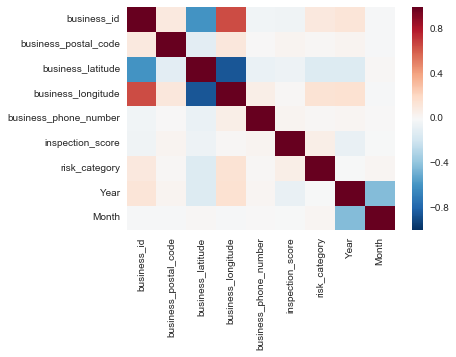

In [5]:
#Hypothesis: As the Year Increases (2013 to 2016)the Inspection_Score increases.
# 1 is the worst, and 100 is the best.
sns.heatmap(food.corr())

In [6]:
food.groupby('Year')[['inspection_score']].mean()

,inspection_score
Year,
2013,86.911640
2014,86.985425
2015,86.549625
2016,85.384658


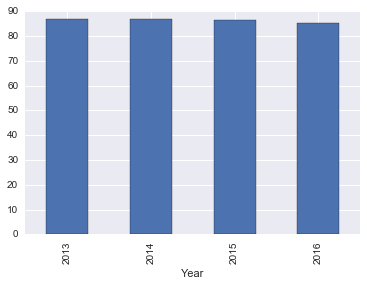

In [7]:
food.groupby('Year')['inspection_score'].mean().plot(kind = 'bar')

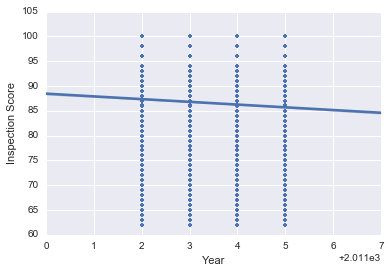

In [8]:
x, y = pd.Series(food['Year'], name="Year"), pd.Series(food['inspection_score'], name="Inspection Score")
ax = sns.regplot(x=x, y=y, marker="+")
#There is actually a slight decrease in the inspection score as the Year increases.
#There might be an issue with the restaraunts keeping there work place safe, hence we
#can reject the hypothesis.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2. Construct and evaluate a linear regression model on the data

---

1. State the variables that are predictors in your linear regression and the target variable.
- Investigate and remove any outliers or other problems in your data. _This is a subjective process._
- Construct a linear regression model.
- Evaluate the model. How does the $R^2$ of the overall model compare to cross-validated $R^2$. What do the differences in $R^2$ mean?
  - Use test / train split
  - Use K-Folds
  - Compare and explain your results with both
- Visualize the evaluation metrics of your analysis in clear charts.
- Summarize your results in the context of your hypothesis. Frame this as if you are presenting to non-technical readers.


In [9]:
food.describe().T

,count,mean,std,min,25%,50%,75%,max
business_id,51779.0,4.046256e+04,32553.767793,1.000000e+01,4.532000e+03,3.844200e+04,7.084900e+04,8.846100e+04
business_postal_code,51779.0,9.577628e+04,11024.788355,0.000000e+00,9.410800e+04,9.411200e+04,9.412200e+04,1.663719e+05
business_latitude,51779.0,3.774815e+01,0.044428,3.766882e+01,3.768539e+01,3.776343e+01,3.778653e+01,3.787594e+01
business_longitude,51779.0,-1.223453e+02,0.131328,-1.225109e+02,-1.224298e+02,-1.224087e+02,-1.221418e+02,-1.217040e+02
business_phone_number,51779.0,1.415547e+10,161008.917123,1.415359e+10,1.415542e+10,1.415542e+10,1.415542e+10,1.415726e+10
inspection_score,51779.0,8.649898e+01,7.647366,6.200000e+01,8.300000e+01,8.618363e+01,9.200000e+01,1.000000e+02
risk_category,51779.0,1.185094e+00,1.192377,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
Year,51779.0,2.014555e+03,1.005944,2.013000e+03,2.014000e+03,2.014000e+03,2.015000e+03,2.016000e+03
Month,51779.0,6.125843e+00,3.217957,1.000000e+00,3.000000e+00,6.000000e+00,9.000000e+00,1.200000e+01


R^2:  0.0142959394403


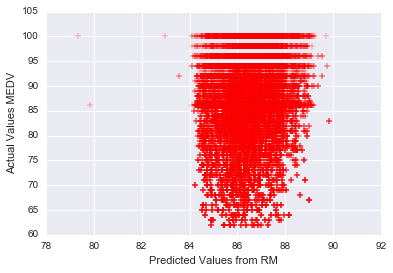

In [10]:
#Predictors & Target Variables.

#The predictor variables are business_latitude, longitude, Year, Month
#My goal is to see if the location(latitude&longitude) and Date(Year&Month)
#impact the inspection score.
#The target variable is the inspection score.

#Scale the Data and select the predictor variables.
scaler      =  StandardScaler()
columns     =  ['business_latitude','business_longitude', 'Year', 'Month']

#Set the predictor and target variables.
X = food[columns]
y = food.inspection_score.values
Xn = scaler.fit_transform(X)

#Fit the model and score
lm = LinearRegression()
model = lm.fit(Xn, y)
predictions  =  model.predict(Xn)
score = model.score(Xn, y)

print "R^2: ", score

plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM")
plt.ylabel("Actual Values MEDV")

plt.show()

#The R2 is 0.014 which means the model doesn't explain the variability of the target variable
#around the mean. To improve the R2 use cross validation and a test/train split.

In [11]:
#Outliers were previously removed.
#Using the test/train test to calculate R2
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.4)

print X_train.shape, y_train.shape
print X_test.shape, y_test.shape
print predictions.shape

(20711, 4) (20711,)
(31068, 4) (31068,)
(51779,)


Score: 0.0149875313251


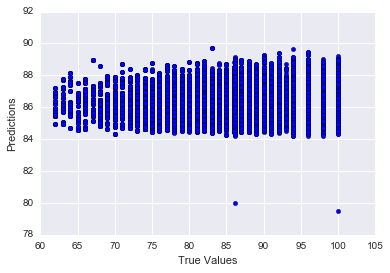

In [12]:
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

print "Score:", model.score(X_test, y_test)
#The R2 is slightly better than the previous R2 without the train/test. This means
#the model is better in terms of explaining the variability of the predictor variables.

In [13]:
#Using k folds to calculate R2.
scores = cross_val_score(lm, X, y, cv=10)

predictions = cross_val_predict(lm, X, y, cv=10)
print "Cross-validated scores:", scores

accuracy = metrics.r2_score(y, predictions)
print "Cross-Predicted Accuracy:", accuracy

#The R2 is slightly worse than the test/train set.
#In general the model used to map the variables Latitude, Longitude, Year, 
#and Month don't have much variability around the mean. By increasing the 
#year the scores decrease which is similar to the hypothesis we got in #1.

Cross-validated scores: [ 0.01706529  0.03132799  0.00706922 -0.00216417  0.01205589 -0.00619928
  0.01608176  0.00870887  0.01197933 -0.00086528]
Cross-Predicted Accuracy: 0.0130421413312


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2.2 Explain $R^2$ vs. mean squared error (MSE)

---

1. If you have negative $R^2$ values in cross-validation, what does this mean? 
2. Why can $R^2$ only be negative when the model is tested on new data?

In [14]:
#If you have negative  R2  values in cross-validation, what does this mean?
#A negative R2 value means the chosen model is worse than the baseline model. The model doesn't
#follow the data's trend thus it fits worse than the baseline.

#Why can R2 be negative when the model is tested on new data?
#Adjusted R2 can be negative when the model's new terms improves the model by less
#than what is expected of it. A data that is already tested doesn't have the new
#terms to calculate the adjusted R2.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3. Combine multiple sources of data and evaluate a model with regularized regression

---

**I recommend having many predictors to see benefits from regularization methods, but it's up to you.**

1. Use _NEW_ sources of data for this section. It should not be related to your analysis/hypothesis from section 1.
- Like in part 1, you should state a hypothesis and perform data cleaning and EDA _only_ on the relevant portions of your data. Don't waste time!
- Construct and evaluate different models with cross-validated $R^2$. Compare LinearRegression, Lasso, Ridge, and ElasticNet. Find the optimal hyperparameters (alpha, l1_ratio) using gridsearch.
- Report on which model is best, and why that might be the case (hint: does your data have multicollinearity? Irrelevant variables? Both?)
- Plot visuals that compare the performance of the four models.


In [15]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV

In [32]:
#I am using the yelp dataset since the food inspection dataset only has one csv file.
yelp = pd.read_csv('violations_parsed_words.csv')
yelp = yelp._get_numeric_data()
yelp = yelp.apply(lambda x: x.fillna(x.mean()),axis=0)
yelp = yelp[(np.abs(stats.zscore(yelp)) < 3).all(axis=1)]
yelp.head()

#Hypothesis: As the violation_count increases the days since first violation increases.

,business_id,score,violation_count,days_since_first_violation,latitude,longitude,polygon,business_count,200,200 feet,...,washed fruits,wastewater,wastewater contamination,wastewater disposal,water,water running,wiping,wiping cloths,worker,worker safety
10,24.0,96.0,4.0,844.0,37.792888,-122.403135,10.0,112.0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,77.0,100.0,1.0,0.0,37.792888,-122.403135,10.0,112.0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,108.0,94.0,2.0,528.0,37.790868,-122.410854,10.0,112.0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,121.0,87.0,1.0,0.0,37.790643,-122.404676,10.0,112.0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,121.0,90.0,2.0,196.0,37.790643,-122.404676,10.0,112.0,0,0,...,0,0,0,0,0,0,0,0,0,0


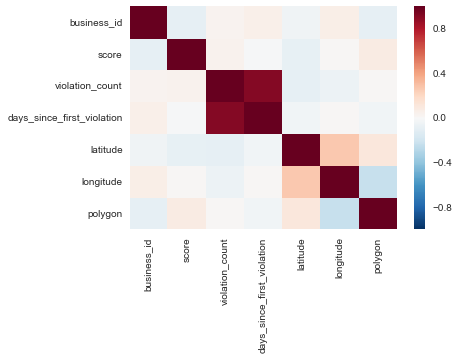

In [17]:
sns.heatmap(yelp.iloc[:,:7].corr())

In [18]:
#Linear Model
scaler      =  StandardScaler()
columns     =  ['violation_count']

#Set the predictor and target variables.
X = yelp[columns]
y = yelp['days_since_first_violation'].values
Xn = scaler.fit_transform(X)


lm = LinearRegression()

linreg_scores = cross_val_score(lm, Xn, y, cv=10)

print np.mean(linreg_scores)

0.833336266592


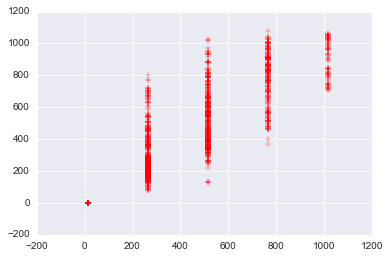

In [19]:
model = lm.fit(Xn, y)
predictions  =  model.predict(Xn)
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)

In [20]:
#Ridge
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(Xn, y)

ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, Xn, y, cv=10)

print np.mean(ridge_scores)

0.83336728909


In [21]:
#Lasso

optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=0)
optimal_lasso.fit(Xn, y)

lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, Xn, y, cv=10)

print np.mean(lasso_scores)

0.833357458392


In [22]:
#ElasticNet

l1_ratios = np.linspace(0.01, 1.0, 50)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=5,
                            verbose=0)
optimal_enet.fit(Xn, y)

enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet_scores = cross_val_score(enet, Xn, y, cv=10)

print np.mean(enet_scores)

#Ridge has the best model since it is able to manage the multicollinearity and get a 
#decent result. The dataset has some variables that have a high linear relationship.
#In this case violation count and days since the first violation are highly 
#correlated.

0.833364946953


In [23]:
ridge.fit(Xn, y)
enet.fit(Xn, y)
lasso.fit(Xn, y)

Lasso(alpha=1.2845075862315847, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [24]:
ridge_resid = y - ridge.predict(Xn)
lasso_resid = y - lasso.predict(Xn)
enet_resid = y - enet.predict(Xn)

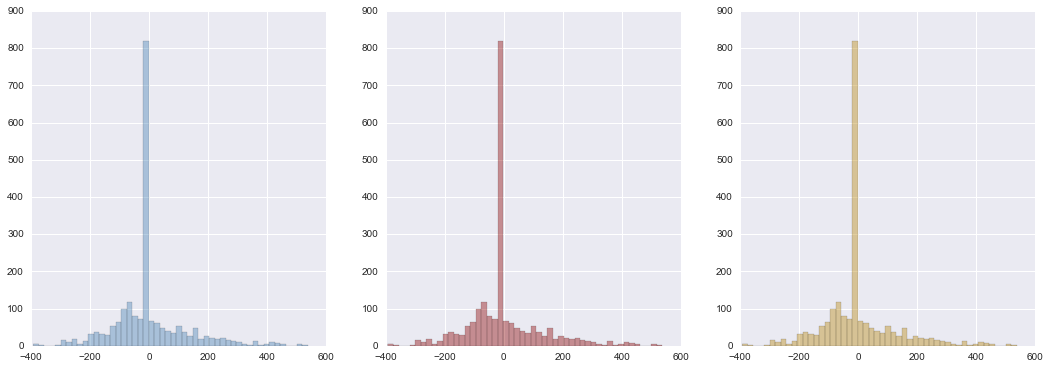

In [25]:
fig, axarr = plt.subplots(1, 3, figsize=(18, 6))

sns.distplot(ridge_resid, bins=50, hist=True, kde=False, 
             color='steelblue', ax=axarr[0], label='Ridge residuals')

sns.distplot(ridge_resid, bins=50, hist=True, kde=False, 
             color='darkred', ax=axarr[1], label='Lasso residuals')

sns.distplot(ridge_resid, bins=50, hist=True, kde=False, 
             color='darkgoldenrod', ax=axarr[2], label='ElasticNet residuals')

plt.show()

#Based on our model and plots we can say as the violation count increases the days since
#the first violation increases.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4. Conduct another, different analysis and report on it

---

1. Combining multiple sources of data (csv files) is required.
- Perform EDA and cleaning on relevant data.
- Construct and compare different regression models with cross-validation.
- Plot descriptive visuals you think are useful for understanding the data.
- Report on your findings.

This section is just another analysis like the first sections, but is more open-ended in what models you decide to build and why. Don't feel obligated to try every out every regularized regression model (though it doesn't hurt). 


In [26]:
business = pd.read_csv('businesses.csv')
inspection = pd.read_csv('inspections.csv')
park = pd.merge(business, inspection, on='business_id', how='left')
park.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,score,date,type
0,10,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,94104,37.791116,-122.403816,+14154217044,94.0,20140729.0,routine
1,10,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,94104,37.791116,-122.403816,+14154217044,92.0,20140114.0,routine
2,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262,94.0,20141110.0,routine
3,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262,94.0,20140214.0,routine
4,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262,96.0,20130904.0,routine


In [27]:
park.postal_code = pd.to_numeric(park.postal_code, errors = 'coerce')

park['Year'] = park['date'].floordiv(10000)
park = park._get_numeric_data()
park = park.apply(lambda x: x.fillna(x.mean()),axis=0)
park = park[(np.abs(stats.zscore(park)) < 3).all(axis=1)]
park.drop('date', axis=1, inplace=True)
park.head()

,business_id,postal_code,latitude,longitude,score,Year
0,10,94104.0,37.791116,-122.403816,94.0,2014.0
1,10,94104.0,37.791116,-122.403816,92.0,2014.0
2,19,94109.0,37.786848,-122.421547,94.0,2014.0
3,19,94109.0,37.786848,-122.421547,94.0,2014.0
4,19,94109.0,37.786848,-122.421547,96.0,2013.0


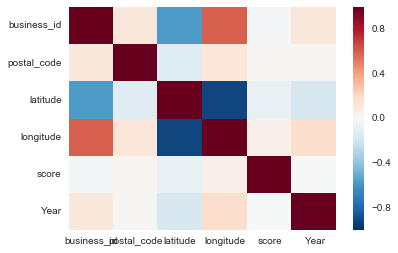

In [28]:
sns.heatmap(park.corr())

Cross-Predicted Accuracy: -0.00725884907876


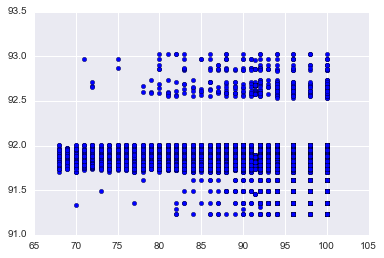

In [29]:
scaler      =  StandardScaler()
columns     =  ['Year', 'postal_code']
park[columns] =  scaler.fit_transform(park[columns])

X = park[columns]
y = park.score.values
Xn = scaler.fit_transform(X)

scores = cross_val_score(lm, Xn, y, cv=15)
predictions = cross_val_predict(lm, Xn, y, cv=15)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print "Cross-Predicted Accuracy:", accuracy

Cross-Predicted Accuracy: -0.0109900391711


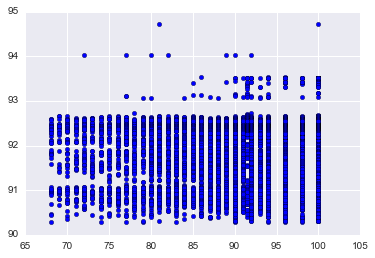

In [30]:
columns     =  ['longitude', 'business_id']
park[columns] =  scaler.fit_transform(park[columns])

X = park[columns]
y = park.score.values
Xn = scaler.fit_transform(X)

scores = cross_val_score(lm, Xn, y, cv=15)
predictions = cross_val_predict(lm, Xn, y, cv=15)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print "Cross-Predicted Accuracy:", accuracy

In [31]:
#Both these models have a negative R2 value. The chosen models don't follow the trend of the 
#data, and we can say it fits worse than the baseline model. The year and postal code
#model fits better than the longitude and business_id thus we can say model 1's variables 
#slightly fits the model better.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.2 Ploting GridSearch with Lasso, Ridge, or Elasticnet
---
1. Using the gridsearch results, plot your score in relation to your parameters.
1. Plot the effect on your coefficients given alpha.
1. Plot any other parameter change to visualize the impact of any other hyperparameter.

It's helpful to understand the impact of parameters used in Gridsearch, and that you are comfortable working with the data that is generated for reporting to explore the results visually.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Bias-variance tradeoff

---

1. Select San Francisco data of your choice and construct a regularized regression model (this can be data from an earlier analysis if you like). Ideally the model should actually improve across regularization strengths...
- Gridsearch the regularization parameters to find the optimal.
- Plot the regularization parameter against the cross-validated $R^2$.
- Explain how regularization and regularization strength is related to the bias-variance tradeoff.


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.1 Calculate the approximated $\text{bias}^2$ and variance across regularization strengths.

---

You can obviously use my code from the bias-variance lab to do this. 

Plot the bias and variance change _with_ the cross-validated $R^2$. 

You'll need to scale these values somehow to put them on the same chart (I recommend (MinMaxScaler)[http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html] to put $\text{bias}^2$ and variance on the same scale as cross-validated $R^2$.

<img src="http://imgur.com/HNPKfE8.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Custom regularized regression penalties

---

The $\lambda1$ and $\lambda2$ norm regularization penalties (Lasso and Ridge) are the most commonly used regularization penalties. They have a solid foundation in statistics and evidence of effectiveness. However, these are not the only possible penalties for regression – sometimes new, customized penalties give additional performance and predictive power to models depending on the context.

For example, when I worked in neuroscience [we created an effective penalized regression dubbed "GraphNet"](http://arxiv.org/abs/1110.4139) that combined the Lasso and Ridge penalties like in Elastic net with a third penalty that rewarded clustering of coefficients according to physical distance in FMRI brain activation data.

**Devise of and implement a penalized regression for San Francisco data.** What is your rationale – why would this be useful? How does it perform compared to the standard Ridge, Lasso, and Elastic Net penalties?